In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Separation

In [2]:
# Reading the initial dataset
data_init = pd.read_csv("student-por.csv")
data_init

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."
...,...
644,"MS;""F"";19;""R"";""GT3"";""T"";2;3;""services"";""other""..."
645,"MS;""F"";18;""U"";""LE3"";""T"";3;1;""teacher"";""service..."
646,"MS;""F"";18;""U"";""GT3"";""T"";1;1;""other"";""other"";""c..."
647,"MS;""M"";17;""U"";""LE3"";""T"";3;1;""services"";""servic..."


In [3]:
# Each feature name is split by a semicolon, using ";" as as splitting parameter
data_cols = data_init.columns[0].split(';')

data_feat_split = pd.DataFrame(columns = data_cols)
data_feat_split

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [4]:
# Breaking up the data into their respective features
for i in range(len(data_init)):
    current_row = data_init.iloc[i][0]
    
    val_split = current_row.split(';')
    
    data_feat_split.loc[len(data_feat_split)] = val_split
    
data_feat_split

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,"""F""",18,"""U""","""GT3""","""A""",4,4,"""at_home""","""teacher""",...,4,3,4,1,1,3,4,"""0""","""11""",11
1,GP,"""F""",17,"""U""","""GT3""","""T""",1,1,"""at_home""","""other""",...,5,3,3,1,1,3,2,"""9""","""11""",11
2,GP,"""F""",15,"""U""","""LE3""","""T""",1,1,"""at_home""","""other""",...,4,3,2,2,3,3,6,"""12""","""13""",12
3,GP,"""F""",15,"""U""","""GT3""","""T""",4,2,"""health""","""services""",...,3,2,2,1,1,5,0,"""14""","""14""",14
4,GP,"""F""",16,"""U""","""GT3""","""T""",3,3,"""other""","""other""",...,4,3,2,1,2,5,0,"""11""","""13""",13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,"""F""",19,"""R""","""GT3""","""T""",2,3,"""services""","""other""",...,5,4,2,1,2,5,4,"""10""","""11""",10
645,MS,"""F""",18,"""U""","""LE3""","""T""",3,1,"""teacher""","""services""",...,4,3,4,1,1,1,4,"""15""","""15""",16
646,MS,"""F""",18,"""U""","""GT3""","""T""",1,1,"""other""","""other""",...,1,1,1,1,1,5,6,"""11""","""12""",9
647,MS,"""M""",17,"""U""","""LE3""","""T""",3,1,"""services""","""services""",...,2,4,5,3,4,2,6,"""10""","""10""",10


## Data Cleaning

In [5]:
# Used for distributing work amongst team members and dropping the columns we didn't want to analyze
def data_cutter(columns_names):
    return data_feat_split.loc[:,columns_names]

def column_dropper(data_cut, column_names):
    data_cut.drop(columns = column_names, inplace = True, axis = 1)

In [6]:
data_cols = data_feat_split.columns

In [7]:
# Grant is in charge of processing features 1-10 ('school' - 'Fjob') (Landis ended up doing his features, Grant was unresponsive)
# Eric is in charge of processing features 11-20 ('reason' - 'nursery')
# Landis is in charge of processing features 21-30 ('higher' - 'absences')

data_gc = data_cutter(data_cols[0:10])
data_eb = data_cutter(data_cols[10:20])
data_lh = data_cutter(data_cols[20:30])

In [8]:
# Removing features we deemed unnecessary/not helpful
column_dropper(data_gc, ['school', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob'])

column_dropper(data_eb, ['reason', 'guardian', 'nursery'])

column_dropper(data_lh, ['internet', 'romantic', 'famrel', 'Walc', 'health'])

## data_eb: combining 'schoolsup', 'famsup', 'paid'

In [9]:
# This checks to see if the columns are displayed as yes or no
# If yes in at least 1, then the entry has Academic Support marked as yes
# If no IN ALL THREE then mark it as no 
def has_support(row):
    if row['schoolsup'] == '"yes"' or row['famsup'] == '"yes"' or row['paid'] == '"yes"':
        return 'yes'
    else:
        return 'no'

In [10]:
# Create an Academic Support Column
# Applies my function above to the entries
data_eb['ext_sup'] = data_eb.apply(has_support, axis=1)

# Now that they are combined into one column, the original features can be removed
column_dropper(data_eb, ['schoolsup', 'famsup', 'paid'])

In [11]:
# Data after cutting columns
data_gc

,sex,age
0,"""F""",18
1,"""F""",17
2,"""F""",15
3,"""F""",15
4,"""F""",16
...,...,...
644,"""F""",19
645,"""F""",18
646,"""F""",18
647,"""M""",17


In [12]:
data_eb

,traveltime,studytime,failures,activities,ext_sup
0,2,2,0,"""no""",yes
1,1,2,0,"""no""",yes
2,1,2,0,"""no""",yes
3,1,3,0,"""yes""",yes
4,1,2,0,"""no""",yes
...,...,...,...,...,...
644,1,3,1,"""yes""",no
645,1,2,0,"""no""",yes
646,2,2,0,"""yes""",no
647,2,1,0,"""no""",no


In [13]:
data_lh

,higher,freetime,goout,Dalc,absences
0,"""yes""",3,4,1,4
1,"""yes""",3,3,1,2
2,"""yes""",3,2,2,6
3,"""yes""",2,2,1,0
4,"""yes""",3,2,1,0
...,...,...,...,...,...
644,"""yes""",4,2,1,4
645,"""yes""",3,4,1,4
646,"""yes""",1,1,1,6
647,"""yes""",4,5,3,6


In [14]:
# Putting them all back together
data_clean = pd.concat([data_gc, data_eb, data_lh, data_feat_split['G3']], axis = 1)

data_cols = data_clean.columns

In [15]:
# These are the features we removed from our data. I thought I'd keep them around though. For use later, perhaps...
# data_removed = data_feat_split[['school', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'nursery', 'internet', 'romantic', 'famrel', 'Walc', 'health']]

## Data Preprocessing

In [16]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 649 entries, 0 to 648
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         649 non-null    object
 1   age         649 non-null    object
 2   traveltime  649 non-null    object
 3   studytime   649 non-null    object
 4   failures    649 non-null    object
 5   activities  649 non-null    object
 6   ext_sup     649 non-null    object
 7   higher      649 non-null    object
 8   freetime    649 non-null    object
 9   goout       649 non-null    object
 10  Dalc        649 non-null    object
 11  absences    649 non-null    object
 12  G3          649 non-null    object
dtypes: object(13)
memory usage: 71.0+ KB


In [17]:
# Removing unneccessary characters that are impairing preprocessing
# Coverting binary values in our dataset to 0s and 1s
def strip_quotes(col_names):
    for col in col_names:
        data_clean[col] = data_clean[col].str.strip('"')
        
def object_to_binary(col_names):
    for col in col_names:
        no_mask = data_clean[col] == 'no'
        yes_mask = np.invert(no_mask)
        
        data_clean.loc[no_mask, col] = 0
        data_clean.loc[yes_mask, col] = 1

In [18]:
cols_to_strip = ['sex', 'activities', 'higher']

strip_quotes(cols_to_strip)

In [19]:
cols_to_binary = ['activities', 'ext_sup', 'higher']

object_to_binary(cols_to_binary)

In [20]:
# Changing all numerical data to type 'int'
for i in range(1, len(data_cols)):
    current_col = data_cols[i]
    
    data_clean[current_col] = data_clean[current_col].astype(int)

In [21]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 649 entries, 0 to 648
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         649 non-null    object
 1   age         649 non-null    int32 
 2   traveltime  649 non-null    int32 
 3   studytime   649 non-null    int32 
 4   failures    649 non-null    int32 
 5   activities  649 non-null    int32 
 6   ext_sup     649 non-null    int32 
 7   higher      649 non-null    int32 
 8   freetime    649 non-null    int32 
 9   goout       649 non-null    int32 
 10  Dalc        649 non-null    int32 
 11  absences    649 non-null    int32 
 12  G3          649 non-null    int32 
dtypes: int32(12), object(1)
memory usage: 40.6+ KB


In [22]:
# Data after type conversion and stripping
data_clean

,sex,age,traveltime,studytime,failures,activities,ext_sup,higher,freetime,goout,Dalc,absences,G3
0,F,18,2,2,0,0,1,1,3,4,1,4,11
1,F,17,1,2,0,0,1,1,3,3,1,2,11
2,F,15,1,2,0,0,1,1,3,2,2,6,12
3,F,15,1,3,0,1,1,1,2,2,1,0,14
4,F,16,1,2,0,0,1,1,3,2,1,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,F,19,1,3,1,1,0,1,4,2,1,4,10
645,F,18,1,2,0,0,1,1,3,4,1,4,16
646,F,18,2,2,0,1,0,1,1,1,1,6,9
647,M,17,2,1,0,0,0,1,4,5,3,6,10


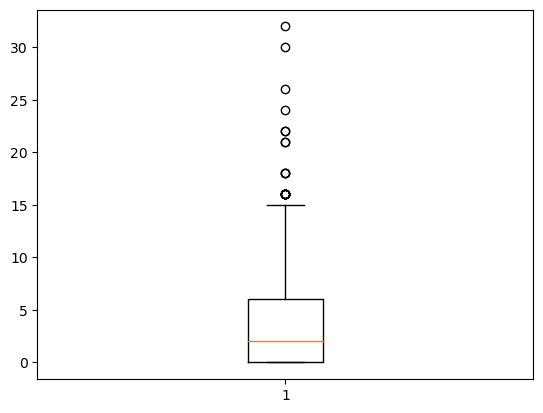

In [23]:
plt.boxplot(data_clean['absences'])
plt.show()

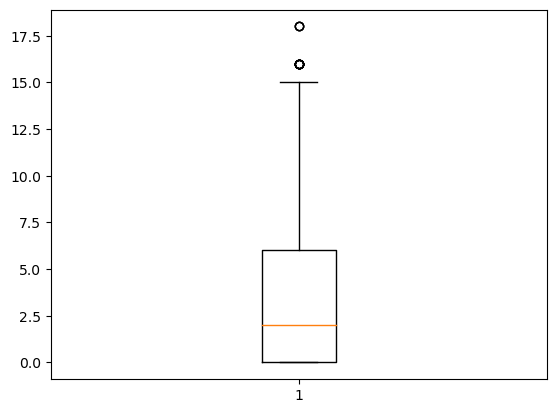

In [24]:
# Performing outlier treatment on 'absences' feature
absence_outliers = data_clean['absences'] <= 20
data_clean = data_clean[absence_outliers]

plt.boxplot(data_clean['absences'])
plt.show()

## Raw(unlabeled) Data Visualizations for Basic Understanding of Trends

In [26]:
# This function creates unlabeled line graphs that show the basic trend between features
# Works for features that start from 0 or 1, to which must be specified in the parameter, start_point
def feat_y_avg_by_feat_x(start_point, feat_x, feat_y):
    vals = data_clean[feat_x].unique()
    if start_point == 0:
        vals_sorted = np.arange(0,len(vals))
    else:
        vals_sorted = np.arange(1,len(vals)+1)
    
    avgs = []
    
    for val in vals_sorted:
        mask = data_clean[feat_x] == val
        data_mask = data_clean[mask]
        
        avg = round(data_mask[feat_y].mean(),2)
        avgs.append(avg)
        
    plt.plot(vals_sorted, avgs)

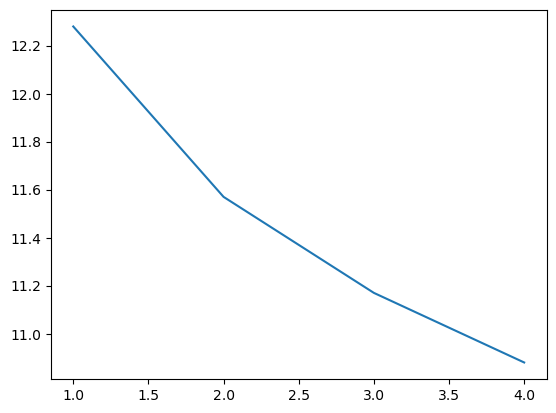

In [27]:
feat_y_avg_by_feat_x(1, 'traveltime', 'G3')

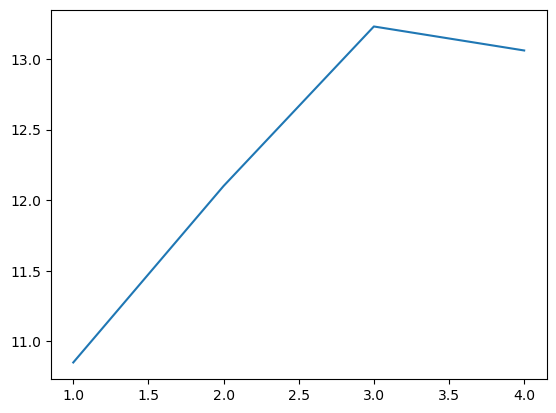

In [28]:
feat_y_avg_by_feat_x(1, 'studytime', 'G3')

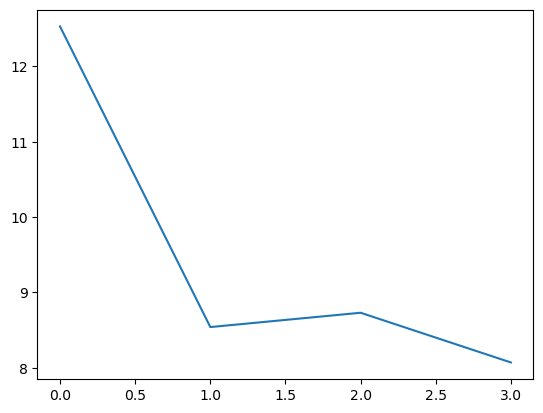

In [29]:
feat_y_avg_by_feat_x(0, 'failures', 'G3')

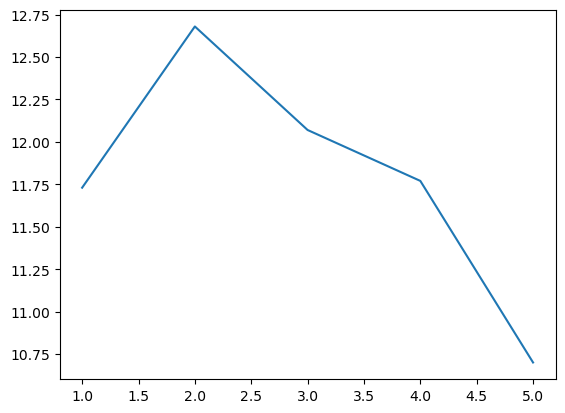

In [30]:
feat_y_avg_by_feat_x(1, 'freetime', 'G3')

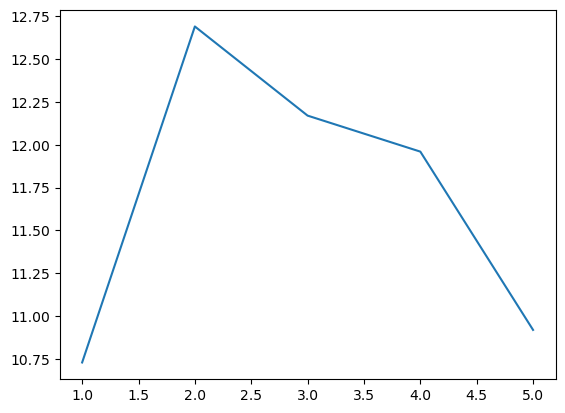

In [31]:
feat_y_avg_by_feat_x(1, 'goout', 'G3')

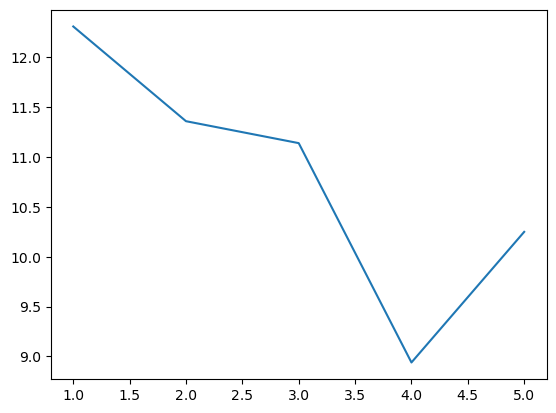

In [32]:
feat_y_avg_by_feat_x(1, 'Dalc', 'G3')

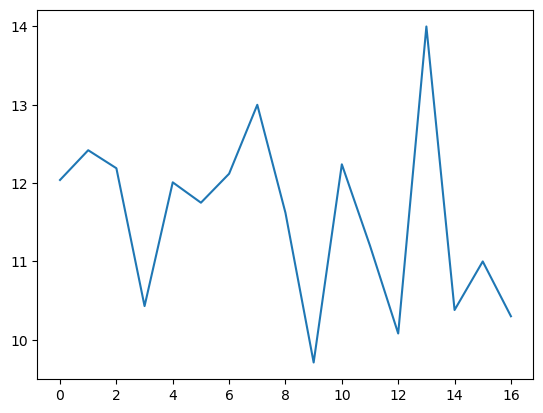

In [33]:
feat_y_avg_by_feat_x(0, 'absences', 'G3')

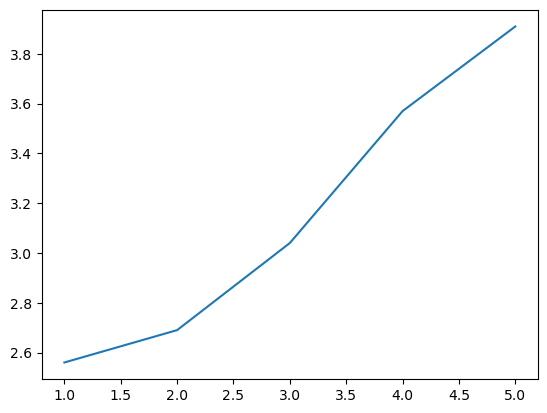

In [34]:
feat_y_avg_by_feat_x(1, 'freetime', 'goout')

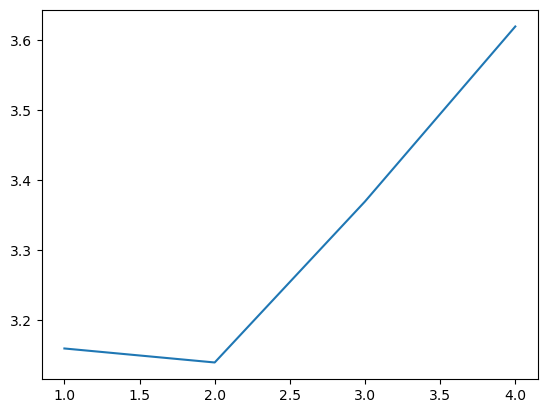

In [35]:
feat_y_avg_by_feat_x(1, 'traveltime', 'goout')

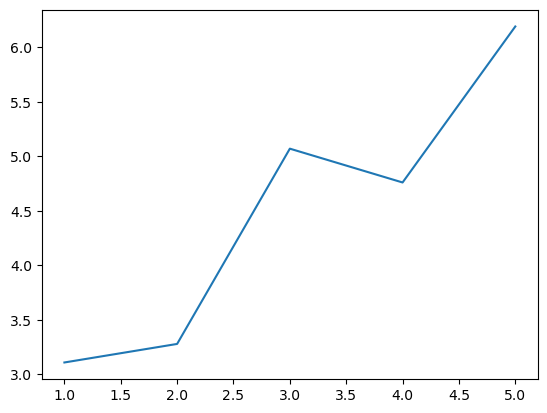

In [36]:
feat_y_avg_by_feat_x(1, 'Dalc', 'absences')

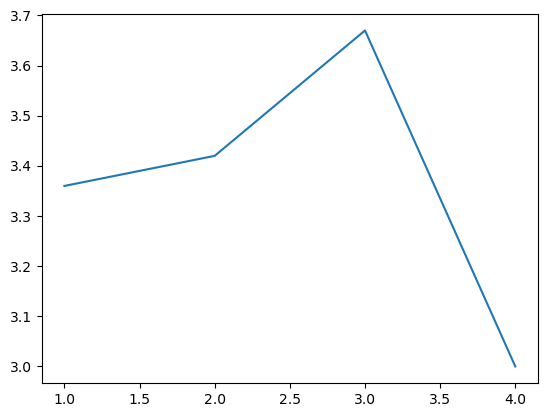

In [37]:
feat_y_avg_by_feat_x(1, 'traveltime', 'absences')

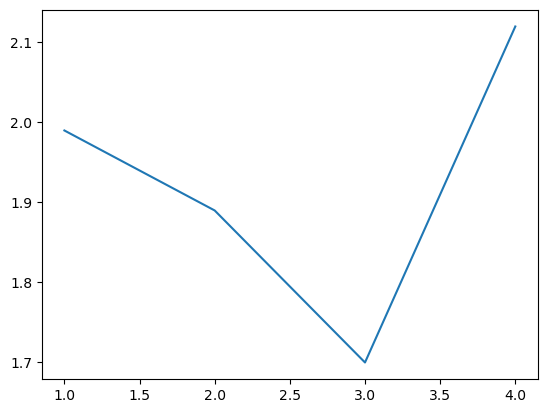

In [38]:
feat_y_avg_by_feat_x(1, 'traveltime', 'studytime')

In [ ]:
# I could not use my previous function for these graphs below so I had to run their own code blocks rather than the function

## Studytime vs Activities

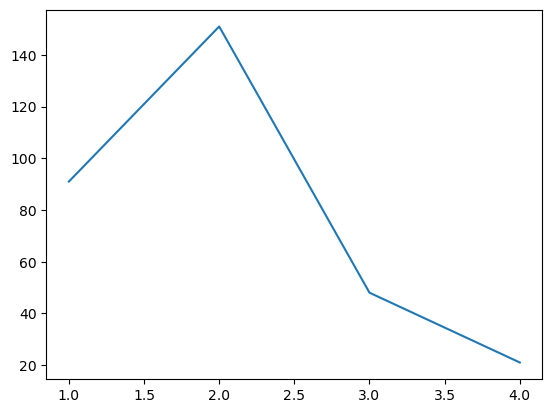

In [39]:
vals = data_clean['studytime'].unique()

vals_sorted = np.arange(1,len(vals)+1)

counts = []

for val in vals_sorted:
    mask = data_clean['studytime'] == val
    data_mask = data_clean[mask]
    
    mask = data_mask['activities'] == 1
    data_mask = data_mask[mask]
    
    count = len(data_mask)
    counts.append(count)

plt.plot(vals_sorted, counts)

## Gender vs Activities

<BarContainer object of 2 artists>

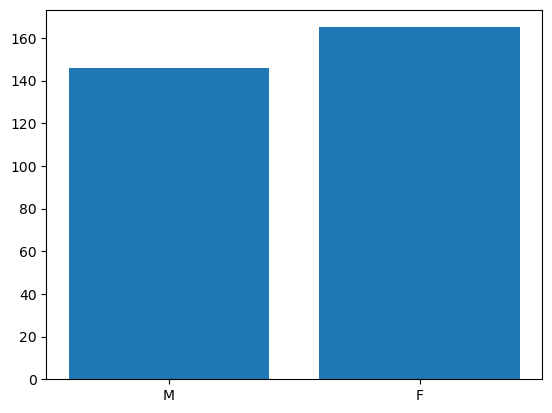

In [40]:
vals = data_clean['sex'].unique()

vals_sorted = ['M', 'F']

counts = []

for val in vals_sorted:
    mask = data_clean['sex'] == val
    data_mask = data_clean[mask]
    
    #Number of people who do activities
    mask = data_mask['activities'] == 1
    data_mask = data_mask[mask]
    
    count = len(data_mask)
    counts.append(count)

plt.bar(vals_sorted, counts)

## Higher Ed vs External Support

<BarContainer object of 2 artists>

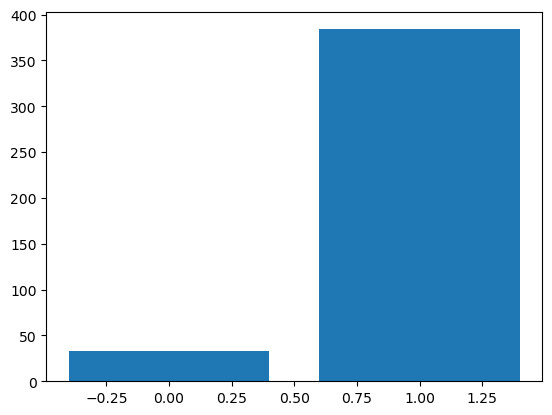

In [41]:
vals = data_clean['higher'].unique()

vals_sorted = [0, 1]

counts = []

for val in vals_sorted:
    mask = data_clean['higher'] == val
    data_mask = data_clean[mask]
    
    #Number of people who have extra support
    mask = data_mask['ext_sup'] == 1
    data_mask = data_mask[mask]
    
    count = len(data_mask)
    counts.append(count)

plt.bar(vals_sorted, counts)

## Gender vs Higher Ed

<BarContainer object of 2 artists>

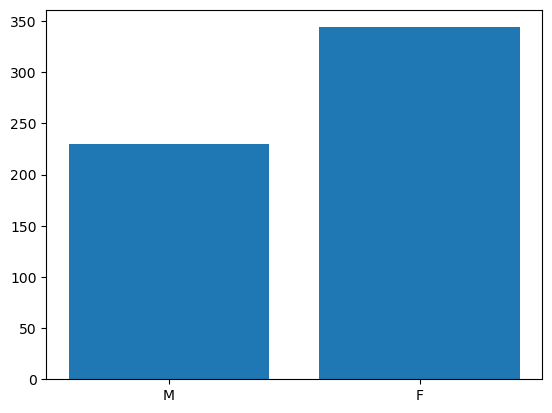

In [42]:
vals = data_clean['sex'].unique()

vals_sorted = ['M', 'F']

counts = []

for val in vals_sorted:
    mask = data_clean['sex'] == val
    data_mask = data_clean[mask]

    #Number of people who want higher ed
    mask = data_mask['higher'] == 1
    data_mask = data_mask[mask]
    
    count = len(data_mask)
    counts.append(count)

plt.bar(vals_sorted, counts)

## Age vs Failures

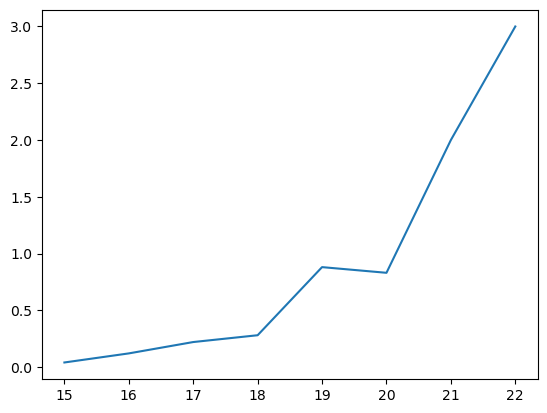

In [43]:
vals = data_clean['age'].unique()
vals_sorted = np.arange(15,len(vals)+15)

avgs = []

for val in vals_sorted:
    mask = data_clean['age'] == val
    data_mask = data_clean[mask]

    avg = round(data_mask['failures'].mean(),2)
    avgs.append(avg)

plt.plot(vals_sorted, avgs)

<BarContainer object of 5 artists>

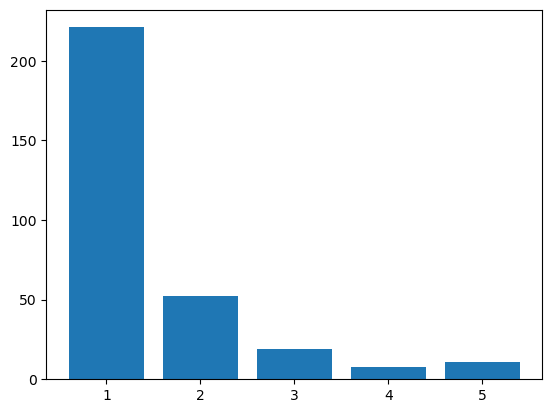

In [44]:
vals = data_clean['Dalc'].unique()
vals_sorted = np.arange(1,len(vals)+1)

counts = []

for val in vals_sorted:
    mask = data_clean['Dalc'] == val
    data_mask = data_clean[mask]

    mask = data_mask['activities'] == 1
    data_mask = data_mask[mask]
    
    count = len(data_mask)
    counts.append(count)

plt.bar(vals_sorted, counts)

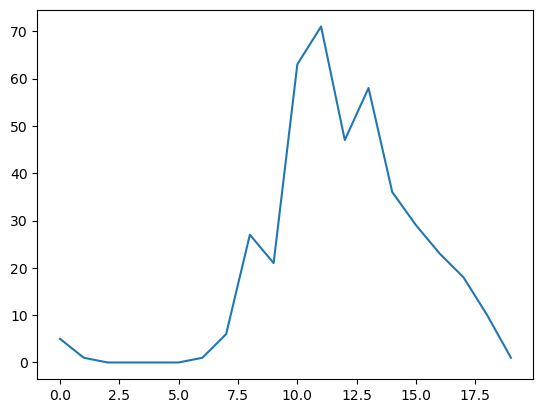

In [45]:
vals = data_clean['G3'].unique()

vals_sorted = np.arange(data_clean ['G3'].max()+1)

counts = []

for val in vals_sorted:
    mask = data_clean['G3'] == val
    data_mask = data_clean[mask]
    
    mask = data_mask['ext_sup'] == 1
    data_mask = data_mask[mask]
    
    count = len(data_mask)
    counts.append(count)

plt.plot(vals_sorted, counts)

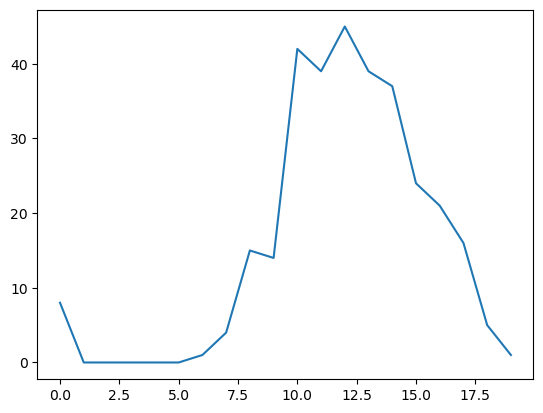

In [46]:
vals = data_clean['G3'].unique()

vals_sorted = np.arange(data_clean ['G3'].max()+1)

counts = []

for val in vals_sorted:
    mask = data_clean['G3'] == val
    data_mask = data_clean[mask]
    
    mask = data_mask['activities'] == 1
    data_mask = data_mask[mask]
    
    count = len(data_mask)
    counts.append(count)

plt.plot(vals_sorted, counts)

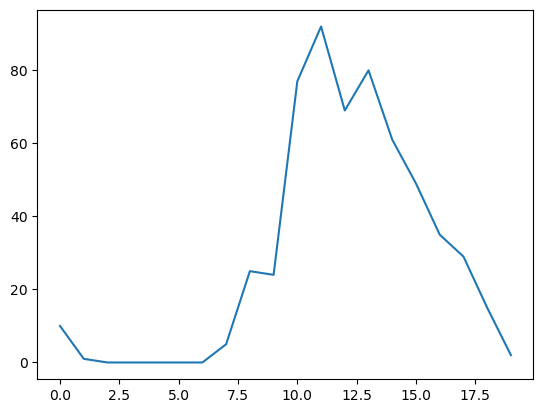

In [47]:
vals = data_clean['G3'].unique()

vals_sorted = np.arange(data_clean ['G3'].max()+1)

counts = []

for val in vals_sorted:
    mask = data_clean['G3'] == val
    data_mask = data_clean[mask]
    
    mask = data_mask['higher'] == 1
    data_mask = data_mask[mask]
    
    count = len(data_mask)
    counts.append(count)

plt.plot(vals_sorted, counts)

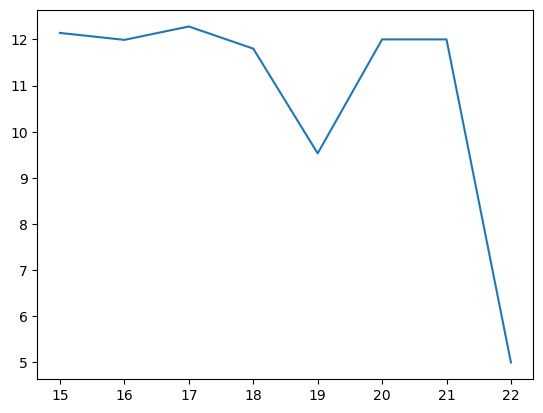

In [48]:
vals = data_clean['age'].unique()
vals_sorted = np.arange(15,len(vals)+15)

avgs = []

for val in vals_sorted:
    mask = data_clean['age'] == val
    data_mask = data_clean[mask]

    avg = round(data_mask['G3'].mean(),2)
    avgs.append(avg)

plt.plot(vals_sorted, avgs)

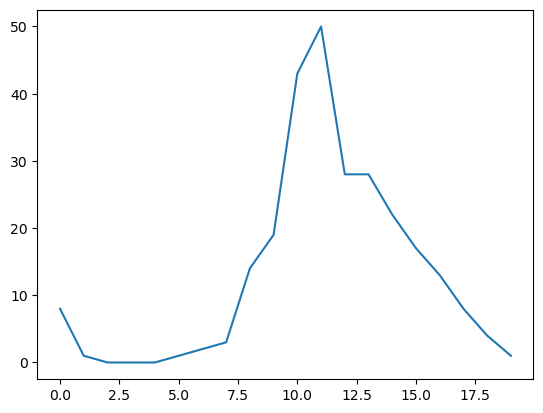

In [49]:
vals = data_clean['G3'].unique()
vals_sorted = np.arange(data_clean ['G3'].max()+1)

counts = []

for val in vals_sorted:
    mask = data_clean['G3'] == val
    data_mask = data_clean[mask]

    mask = data_mask['sex'] == 'M'
    data_mask = data_mask[mask]
    
    count = len(data_mask)
    counts.append(count)

plt.plot(vals_sorted, counts)

## Predictive Modeling

In [50]:
# Prepared the data for predictive modeling
# Changed 'sex' into 0 and 1
data_pred = pd.DataFrame(data = data_clean)

data_pred.loc[data_pred['sex'] == 'M', 'sex'] = 1
data_pred.loc[data_pred['sex'] == 'F', 'sex'] = 0

data_pred

,sex,age,traveltime,studytime,failures,activities,ext_sup,higher,freetime,goout,Dalc,absences,G3
0,0,18,2,2,0,0,1,1,3,4,1,4,11
1,0,17,1,2,0,0,1,1,3,3,1,2,11
2,0,15,1,2,0,0,1,1,3,2,2,6,12
3,0,15,1,3,0,1,1,1,2,2,1,0,14
4,0,16,1,2,0,0,1,1,3,2,1,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,19,1,3,1,1,0,1,4,2,1,4,10
645,0,18,1,2,0,0,1,1,3,4,1,4,16
646,0,18,2,2,0,1,0,1,1,1,1,6,9
647,1,17,2,1,0,0,0,1,4,5,3,6,10


In [51]:
data_pred['G3'].describe()

count    641.000000
mean      11.920437
std        3.229489
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

In [52]:
# Created a 'Grade Group' feature for use during classification
# Dropped 'G3' as it wouldn't be used for modeling
lower_bound = 0
upper_bound = 4

group_num = 1

for i in range(4):
    range_mask = (data_pred['G3'] >= lower_bound) & (data_pred['G3'] <= upper_bound)
    data_pred.loc[range_mask, 'Grade Group'] = group_num
    
    lower_bound += 5
    upper_bound += 5
    
    group_num += 1
    
data_pred.drop(columns = 'G3', inplace = True)

In [53]:
# These were of type object so I had to convert them to type 'int'
data_pred['sex'] = data_pred['sex'].astype(int)
data_pred['Grade Group'] = data_pred['Grade Group'].astype(int)

In [54]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Decision Tree & Random Forest with all features

In [55]:
y_dep = data_pred['Grade Group']

x_ind_1 = data_pred.loc[:,data_pred.columns != 'Grade Group']

y_vals = ['1', '2', '3', '4']

In [56]:
x_ind_1.columns

Index(['sex', 'age', 'traveltime', 'studytime', 'failures', 'activities',
       'ext_sup', 'higher', 'freetime', 'goout', 'Dalc', 'absences'],
      dtype='object')

In [57]:
X_train, X_test, y_train, y_test = tts(x_ind_1, y_dep, test_size = 0.2)

In [58]:
# Create DT classifier object
dt_clf_1 = DecisionTreeClassifier()
dt_clf_1.fit(X_train, y_train)
y_pred = dt_clf_1.predict(X_test)

# Create RF classifier object
rand_forest_clf_1 = RandomForestClassifier()
rand_forest_clf_1.fit(X_train, y_train)
y_pred_1 = rand_forest_clf_1.predict(X_test)

In [59]:
def my_metrics(y_test, y_pred):
    # Evaluation metrics for classification
    confusion = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(confusion)
    accuracy = round(accuracy_score(y_test,y_pred),2)
    print("Accuracy: ", accuracy)
    precision = round(precision_score(y_test, y_pred, average = 'weighted'),2)
    print("Precision: ", precision)
    recall = round(recall_score(y_test, y_pred, average = 'weighted'),2)
    print("Recall: ", recall)
    f1 = round(f1_score(y_test, y_pred, average = 'weighted'),2)
    print("F1 score: ", f1)

In [60]:
my_metrics(y_test, y_pred)

Confusion Matrix:
[[ 2  0  2  0]
 [ 0  9  9  4]
 [ 3  5 58 12]
 [ 0  2 16  7]]
Accuracy:  0.59
Precision:  0.58
Recall:  0.59
F1 score:  0.58


In [61]:
my_metrics(y_test, y_pred_1)

Confusion Matrix:
[[ 2  0  2  0]
 [ 0  0 21  1]
 [ 0  1 71  6]
 [ 0  0 18  7]]
Accuracy:  0.62
Precision:  0.51
Recall:  0.62
F1 score:  0.54


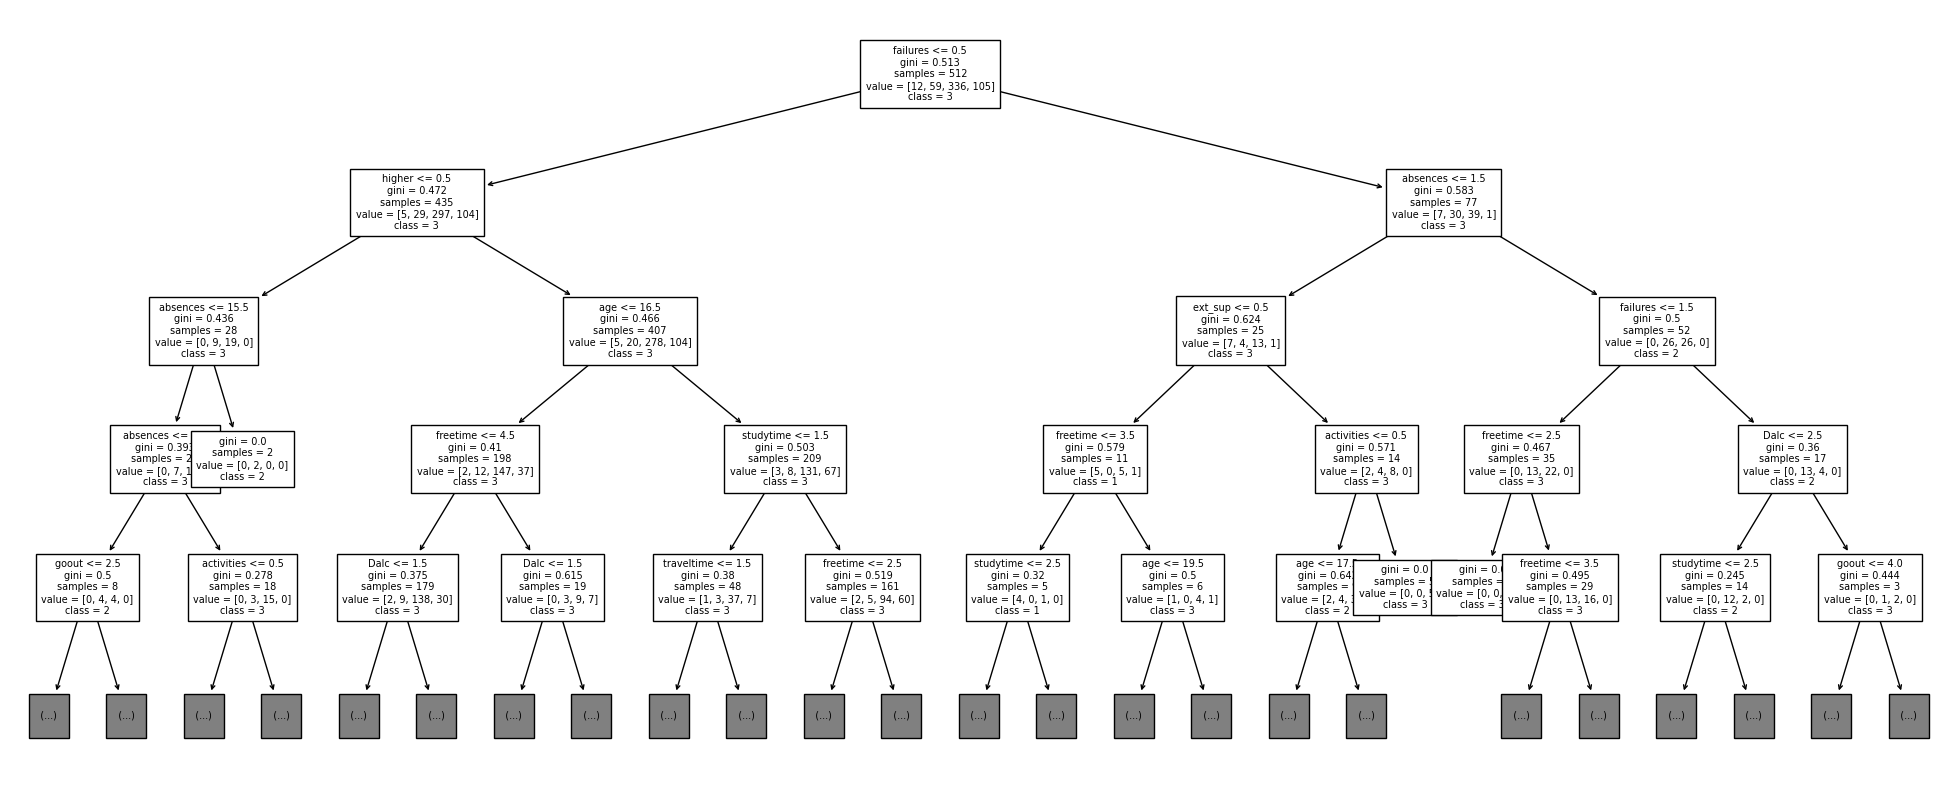

In [62]:
plt.figure(figsize = (25,10))
plot_tree(dt_clf_1, feature_names = ['sex', 'age', 'traveltime', 'studytime', 'failures', 'activities', 'ext_sup', 'higher', 'freetime', 'goout', 'Dalc', 'absences'], class_names = y_vals, max_depth = 4, fontsize=7)
plt.show()

## With only strongly correlated features

In [63]:
x_ind_2 = data_pred[['traveltime', 'studytime', 'failures', 'activities',
       'ext_sup', 'higher', 'freetime', 'goout', 'Dalc']]

x_ind_2.columns

Index(['traveltime', 'studytime', 'failures', 'activities', 'ext_sup',
       'higher', 'freetime', 'goout', 'Dalc'],
      dtype='object')

In [64]:
X_train_2, X_test_2, y_train_2, y_test_2 = tts(x_ind_2,y_dep, test_size = 0.2)

In [65]:
# Create DT classifier object
dt_clf_2 = DecisionTreeClassifier()
dt_clf_2.fit(X_train_2, y_train_2)
y_pred_2 = dt_clf_2.predict(X_test_2)

# Create RF classifier object
rand_forest_clf_2 = RandomForestClassifier()
rand_forest_clf_2.fit(X_train_2, y_train_2)
y_pred_3 = rand_forest_clf_2.predict(X_test_2)

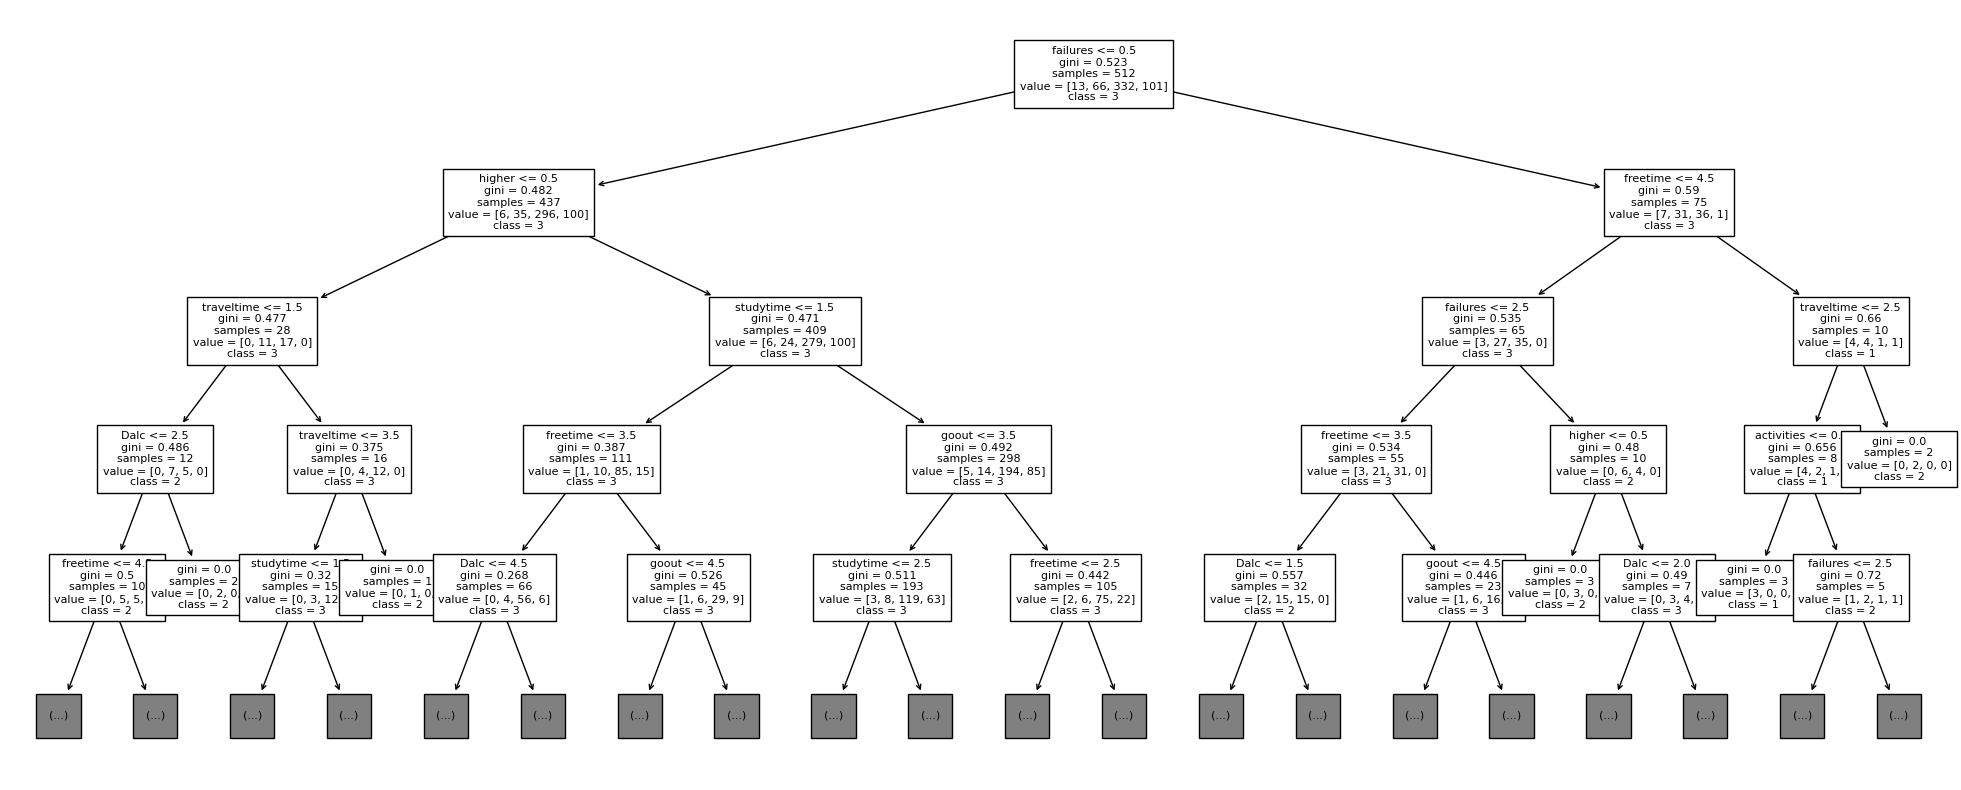

In [66]:
plt.figure(figsize = (25,10))
plot_tree(dt_clf_2, feature_names = ['traveltime', 'studytime', 'failures', 'activities', 'ext_sup', 'higher', 'freetime', 'goout', 'Dalc'], class_names = y_vals, max_depth = 4, fontsize=8)
plt.show()

In [67]:
my_metrics(y_test_2, y_pred_2)

Confusion Matrix:
[[ 1  1  1  0]
 [ 0  4 11  0]
 [ 4 13 49 16]
 [ 0  3 17  9]]
Accuracy:  0.49
Precision:  0.51
Recall:  0.49
F1 score:  0.5


In [68]:
my_metrics(y_test_2, y_pred_3)

Confusion Matrix:
[[ 0  2  1  0]
 [ 0  3 12  0]
 [ 1  7 62 12]
 [ 0  1 22  6]]
Accuracy:  0.55
Precision:  0.51
Recall:  0.55
F1 score:  0.52


# Full Data Visualizations

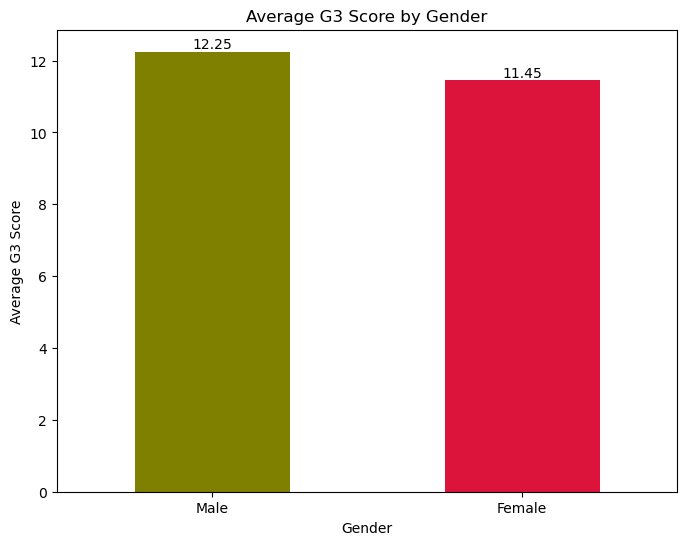

In [69]:
# Visualization
# Group students by gender and plot the average G3 score for each gender
# Assuming 'df' is your DataFrame containing the student data
# Grouping by 'sex' and calculating average G3 score
sex_grouped = data_clean.groupby('sex')['G3'].mean()

# Plotting bar graph for gender vs average G3 score
plt.figure(figsize=(8, 6))
sex_grouped.plot(kind='bar', color=['Olive', 'Crimson'])
plt.title('Average G3 Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average G3 Score')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)

for i, value in enumerate(sex_grouped):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')
    
plt.show()

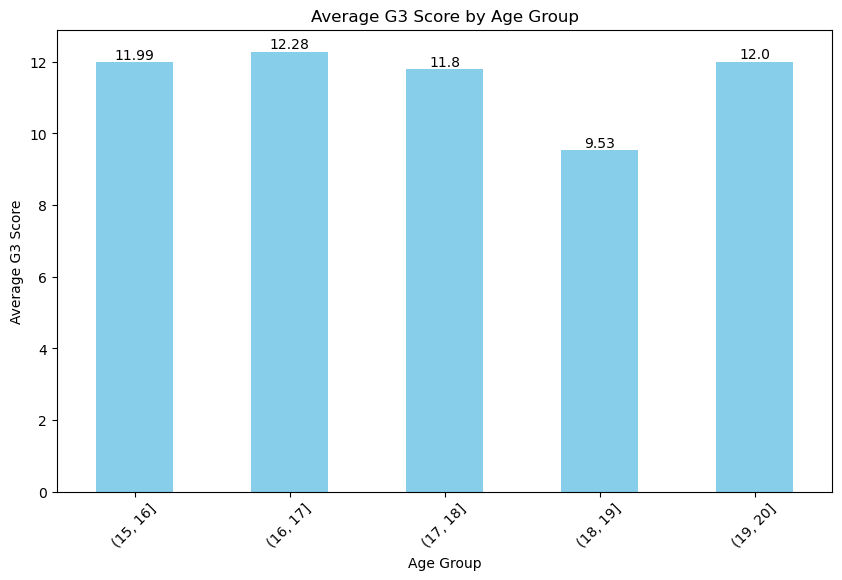

In [70]:
# Group students by age range (e.g., 15-16, 17-18, 19-20) and plot the average G3 score
age_grouped = data_clean.groupby(pd.cut(data_clean['age'], bins=[15, 16, 17, 18, 19, 20]))['G3'].mean()

# Plotting bar graph for age vs average G3 score
plt.figure(figsize=(10, 6))
age_grouped.plot(kind='bar', color='skyblue')
plt.title('Average G3 Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average G3 Score')
plt.xticks(rotation=45)

for i, value in enumerate(age_grouped):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

plt.show()

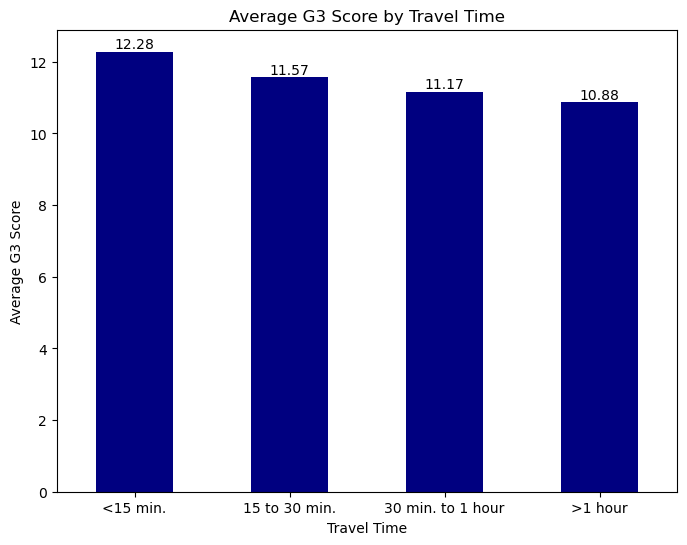

In [71]:
# Group students by travel time (e.g., <15 min, 15-30 min, 30-60 min, >60 min) and plot the average G3 score for each group.
# Mapping travel time categories to their respective labels
travel_time_labels = {
    1: '<15 min.',
    2: '15 to 30 min.',
    3: '30 min. to 1 hour',
    4: '>1 hour'
}

# Grouping by travel time and calculating average G3 score
travel_grouped = data_clean.groupby('traveltime')['G3'].mean()

# Plotting bar graph for travel time vs average G3 score
plt.figure(figsize=(8, 6))
bars = travel_grouped.plot(kind='bar', color='navy')
plt.title('Average G3 Score by Travel Time')
plt.xlabel('Travel Time')
plt.ylabel('Average G3 Score')
plt.xticks(range(len(travel_grouped)), [travel_time_labels[i] for i in travel_grouped.index], rotation=0)

# Adding numbers on top of the bars
for i, value in enumerate(travel_grouped):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

plt.show()

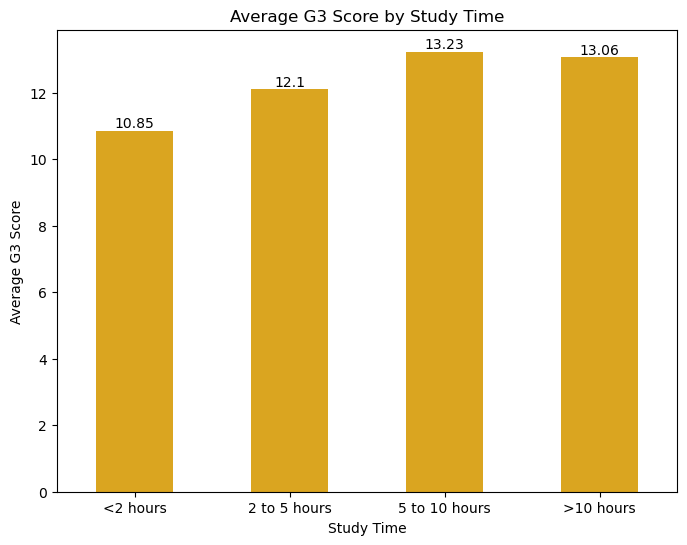

In [72]:
# Mapping study time categories to their respective labels
study_time_labels = {
    1: '<2 hours',
    2: '2 to 5 hours',
    3: '5 to 10 hours',
    4: '>10 hours'
}

# Grouping by study time and calculating average G3 score
study_grouped = data_clean.groupby('studytime')['G3'].mean()

# Plotting bar graph for study time vs average G3 score
plt.figure(figsize=(8, 6))
bars = study_grouped.plot(kind='bar', color='goldenrod')
plt.title('Average G3 Score by Study Time')
plt.xlabel('Study Time')
plt.ylabel('Average G3 Score')
plt.xticks(range(len(study_grouped)), [study_time_labels[i] for i in study_grouped.index], rotation=0)

# Adding numbers on top of the bars
for i, value in enumerate(study_grouped):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

plt.show()

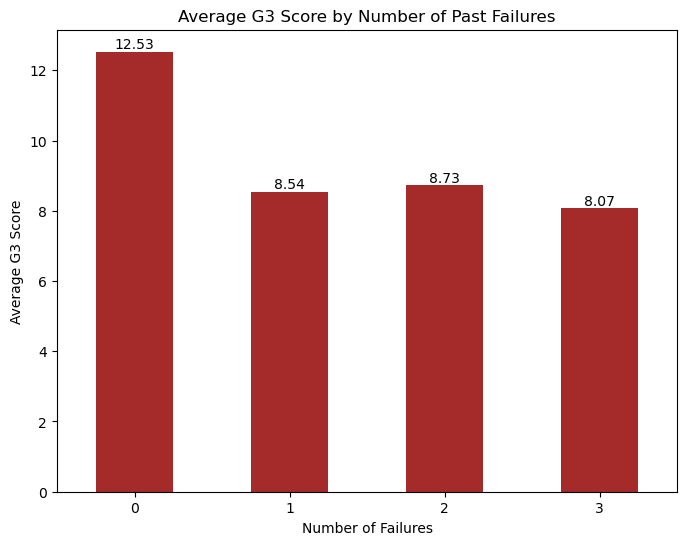

In [73]:
# Group students by the number of past class failures (0, 1, 2, 3 or more) and plot the average G3 score for each group. 
# Grouping by number of past failures and calculating average G3 score
failures_grouped = data_clean.groupby('failures')['G3'].mean()

# Plotting bar graph for number of failures vs average G3 score
plt.figure(figsize=(8, 6))
bars = failures_grouped.plot(kind='bar', color='brown')
plt.title('Average G3 Score by Number of Past Failures')
plt.xlabel('Number of Failures')
plt.ylabel('Average G3 Score')
plt.xticks(rotation=0)

# Adding numbers on top of the bars
for i, value in enumerate(failures_grouped):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

plt.show()

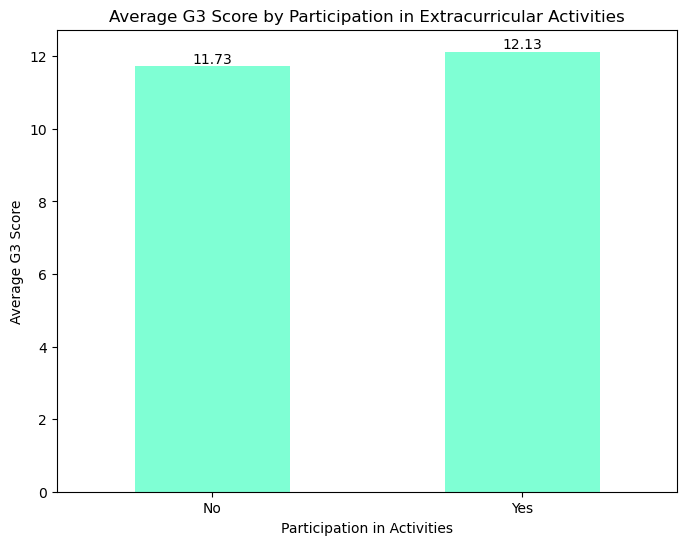

In [74]:
# Group students by participation in extracurricular activities and plot the average G3 score for each group. 
# Grouping by participation in activities and calculating average G3 score
activities_grouped = data_clean.groupby('activities')['G3'].mean()

# Plotting bar graph for participation in activities vs average G3 score
plt.figure(figsize=(8, 6))
bars = activities_grouped.plot(kind='bar', color='aquamarine')
plt.title('Average G3 Score by Participation in Extracurricular Activities')
plt.xlabel('Participation in Activities')
plt.ylabel('Average G3 Score')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)

# Adding numbers on top of the bars
for i, value in enumerate(activities_grouped):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

plt.show()

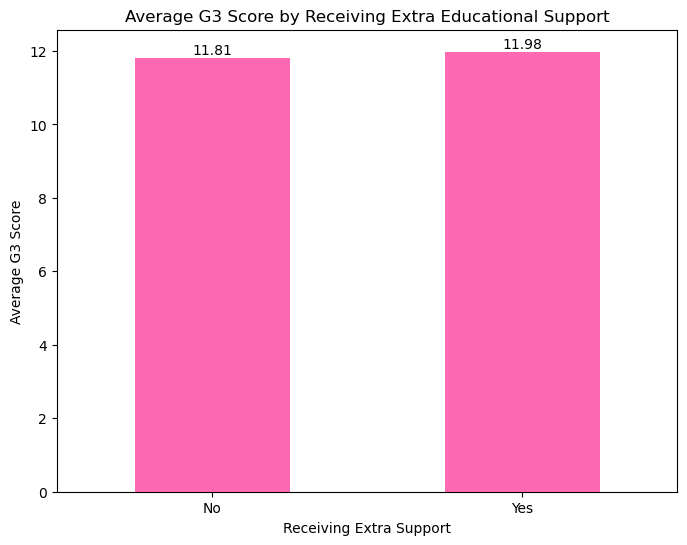

In [75]:
# Group students by whether they receive extra educational support and plot the average G3 score for each group.
# Grouping by receiving extra educational support and calculating average G3 score
ext_support_grouped = data_clean.groupby('ext_sup')['G3'].mean()

# Plotting bar graph for receiving extra educational support vs average G3 score
plt.figure(figsize=(8, 6))
bars = ext_support_grouped.plot(kind='bar', color='hotpink')
plt.title('Average G3 Score by Receiving Extra Educational Support')
plt.xlabel('Receiving Extra Support')
plt.ylabel('Average G3 Score')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)

# Adding numbers on top of the bars
for i, value in enumerate(ext_support_grouped):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

plt.show()

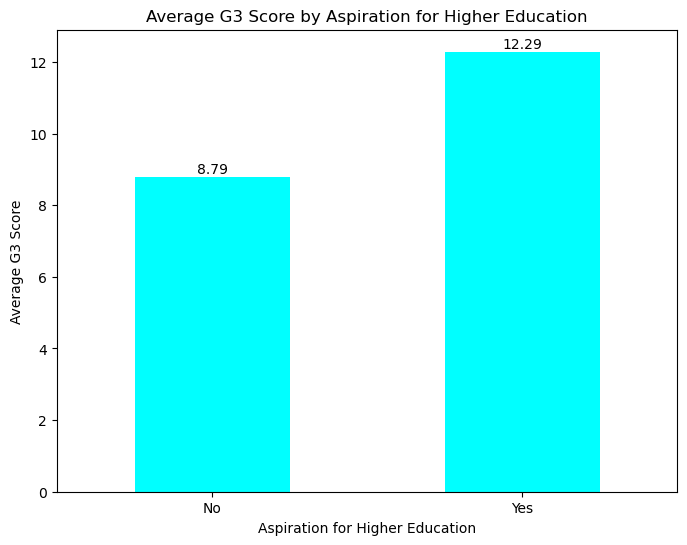

In [76]:
# Group students by their desire to pursue higher education and plot the average G3 score for each group.
# Grouping by aspiration for higher education and calculating average G3 score
higher_grouped = data_clean.groupby('higher')['G3'].mean()

# Plotting bar graph for aspiration for higher education vs average G3 score
plt.figure(figsize=(8, 6))
bars = higher_grouped.plot(kind='bar', color='cyan')
plt.title('Average G3 Score by Aspiration for Higher Education')
plt.xlabel('Aspiration for Higher Education')
plt.ylabel('Average G3 Score')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)

# Adding numbers on top of the bars
for i, value in enumerate(higher_grouped):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

plt.show()

In [77]:
# All in one!
# Grouping by gender and calculating average G3 score
sex_grouped = data_clean.groupby('sex')['G3'].mean()

# Grouping by travel time and calculating average G3 score
travel_grouped = data_clean.groupby('traveltime')['G3'].mean()

# Grouping by study time and calculating average G3 score
study_grouped = data_clean.groupby('studytime')['G3'].mean()

# Grouping by number of past failures and calculating average G3 score
failures_grouped = data_clean.groupby('failures')['G3'].mean()

# Grouping by participation in activities and calculating average G3 score
activities_grouped = data_clean.groupby('activities')['G3'].mean()

# Grouping by receiving extra educational support and calculating average G3 score
ext_support_grouped = data_clean.groupby('ext_sup')['G3'].mean()

# Grouping by aspiration for higher education and calculating average G3 score
higher_grouped = data_clean.groupby('higher')['G3'].mean()

In [78]:
# Define a list of colors for each bar graph
colors = ['burlywood', 'thistle', 'steelblue', 'seagreen', 'goldenrod', 'rebeccapurple', 'firebrick', 'royalblue']

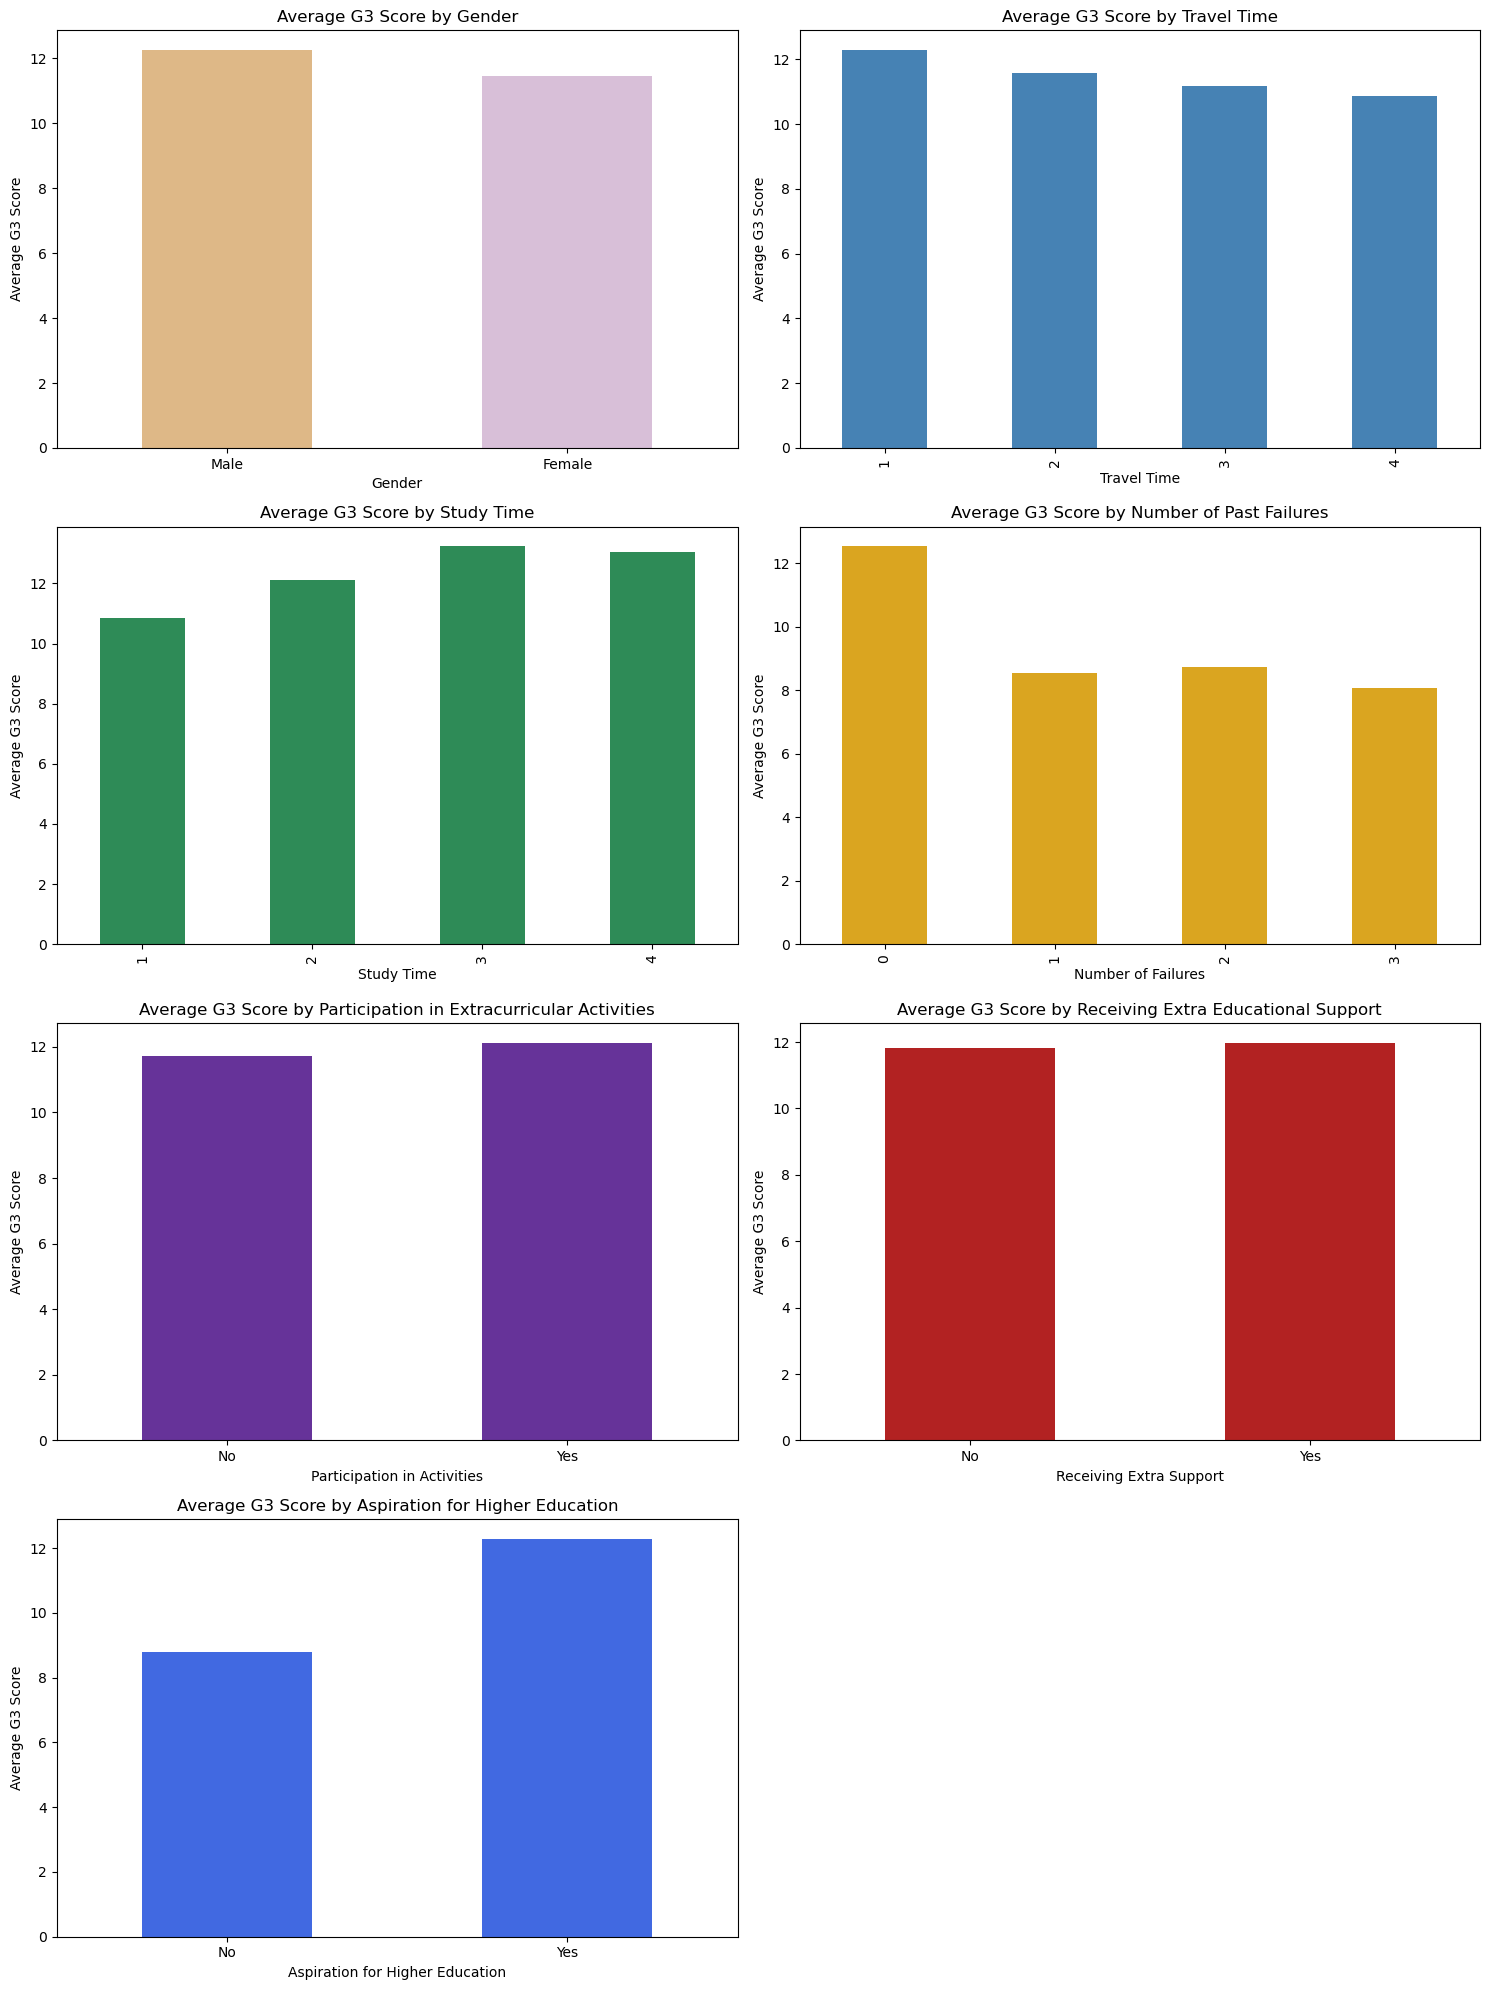

In [80]:
# Creating subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

# Plotting each bar graph in its own subplot
sex_grouped.plot(kind='bar', ax=axes[0, 0], color=[colors[0], colors[1]])
axes[0, 0].set_title('Average G3 Score by Gender')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Average G3 Score')
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_xticklabels(['Male', 'Female'], rotation=0)

travel_grouped.plot(kind='bar', ax=axes[0, 1], color=colors[2])
axes[0, 1].set_title('Average G3 Score by Travel Time')
axes[0, 1].set_xlabel('Travel Time')
axes[0, 1].set_ylabel('Average G3 Score')

study_bars = study_grouped.plot(kind='bar', ax=axes[1, 0], color=colors[3])
axes[1, 0].set_title('Average G3 Score by Study Time')
axes[1, 0].set_xlabel('Study Time')
axes[1, 0].set_ylabel('Average G3 Score')

failures_grouped.plot(kind='bar', ax=axes[1, 1], color=colors[4])
axes[1, 1].set_title('Average G3 Score by Number of Past Failures')
axes[1, 1].set_xlabel('Number of Failures')
axes[1, 1].set_ylabel('Average G3 Score')

activities_grouped.plot(kind='bar', ax=axes[2, 0], color=colors[5])
axes[2, 0].set_title('Average G3 Score by Participation in Extracurricular Activities')
axes[2, 0].set_xlabel('Participation in Activities')
axes[2, 0].set_ylabel('Average G3 Score')
axes[2, 0].set_xticks([0, 1])
axes[2, 0].set_xticklabels(['No', 'Yes'], rotation=0)

ext_support_grouped.plot(kind='bar', ax=axes[2, 1], color=colors[6])
axes[2, 1].set_title('Average G3 Score by Receiving Extra Educational Support')
axes[2, 1].set_xlabel('Receiving Extra Support')
axes[2, 1].set_ylabel('Average G3 Score')
axes[2, 1].set_xticks([0, 1])
axes[2, 1].set_xticklabels(['No', 'Yes'], rotation=0)

higher_grouped.plot(kind='bar', ax=axes[3, 0], color=colors[7])
axes[3, 0].set_title('Average G3 Score by Aspiration for Higher Education')
axes[3, 0].set_xlabel('Aspiration for Higher Education')
axes[3, 0].set_ylabel('Average G3 Score')
axes[3, 0].set_xticks([0, 1])
axes[3, 0].set_xticklabels(['No', 'Yes'], rotation=0)

# Removing empty subplot
fig.delaxes(axes[3, 1])

plt.tight_layout()
plt.show()